In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation
from keras.layers import Dropout, Dense, Flatten, BatchNormalization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir ='/content/drive/MyDrive/DATASET/TRAIN'
test_dir = '/content/drive/MyDrive/DATASET/TEST'

In [29]:
class_names = os.listdir((train_dir))
print(f'Names of categories: {len(class_names)}')

Names of categories: 2


In [30]:
count_train = {}
count_test = {}

for i in class_names:
    count_train[i] = len(os.listdir(os.path.join(train_dir, i)))
    count_test[i] = len(os.listdir(os.path.join(test_dir, i)))

print(f'Total number of images in train set: {sum(list(count_train.values()))}')
print(f'Total number of images in test set: {sum(list(count_test.values()))}')

Total number of images in train set: 22644
Total number of images in test set: 2520


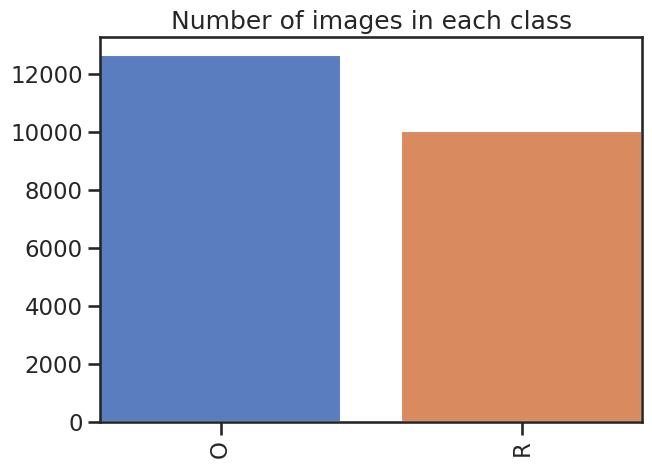

In [33]:

sns.set_context('talk')
sns.set_palette(sns.color_palette('muted'))
sns.set_style('ticks')

plt.figure(figsize=(7, 5))
sns.barplot(x=list(count_train.keys()), y=list(count_train.values())).set_title('Number of images in each class')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.show()

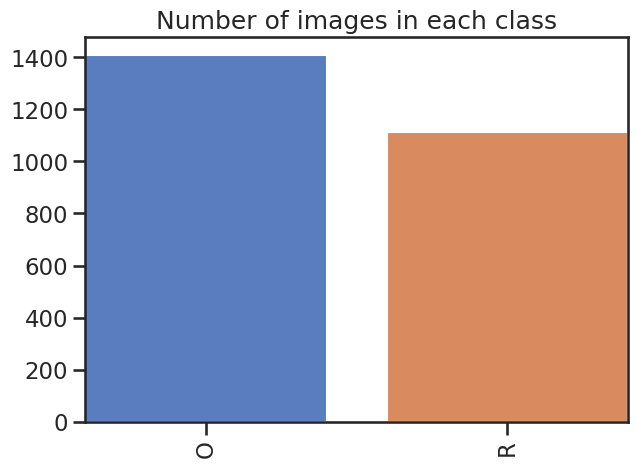

In [34]:
sns.set_context('talk')
sns.set_palette(sns.color_palette('muted'))
sns.set_style('ticks')

plt.figure(figsize=(7, 5))
sns.barplot(x=list(count_test.keys()), y=list(count_test.values())).set_title('Number of images in each class')
plt.xticks(rotation = 90)
plt.margins(x=0)
plt.show()

In [4]:

batch_size = 32
img_height = 64
img_width = 64


In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 22644 files belonging to 2 classes.
Using 18116 files for training.


In [6]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2520 files belonging to 2 classes.
Using 504 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)


['O', 'R']


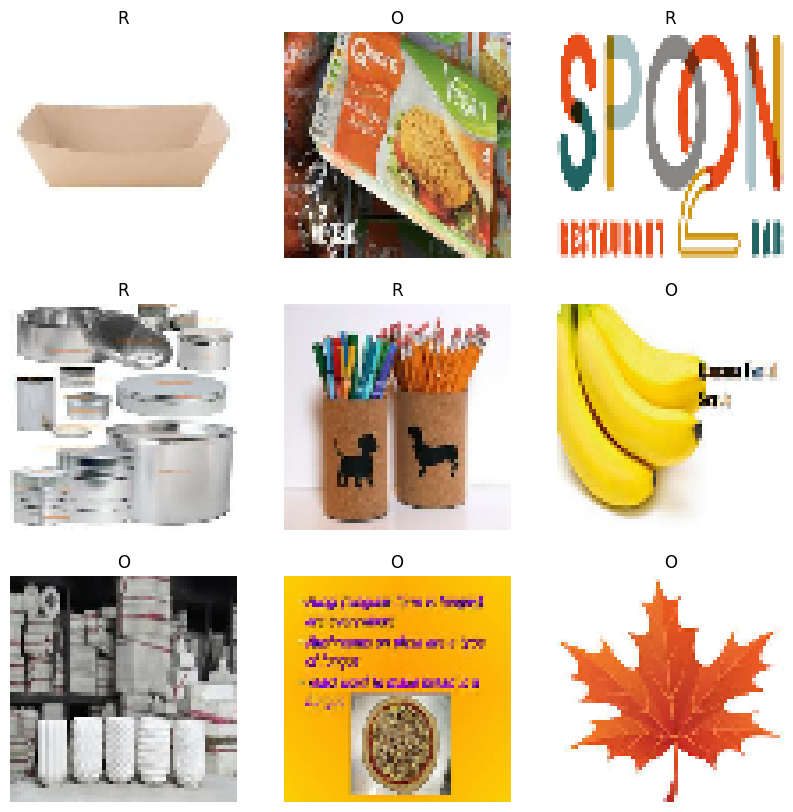

In [8]:
plt.figure(figsize= (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [9]:

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 64, 64, 3)
(32,)


In [10]:

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [11]:

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
X_train, y_train = next(iter(normalized_ds))
first_image = X_train[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [12]:
normalized_test = test_ds.map(lambda x, y: (normalization_layer(x), y))
X_test, y_test = next(iter(normalized_test))
first_img = X_test[0]
print(np.min(first_img), np.max(first_img))

0.0 1.0


Creating the model

We build model with Convolutional Neural Network (CNN) and we will test a few models.

The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with three Dense layers. First two layers are activated by a relu activation function and the last is activated by a sigmoid activation function.

Compile the model:

We choose the Adam optimizer and the loss function: binary_crossentropy. To view training and validation accuracy for each training epoch, we use metrics "accuracy".

In [13]:

model = Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation="relu"),
  tf.keras.layers.Dense(units=64, activation="relu"),
  tf.keras.layers.Dense(units=1, activation="sigmoid")
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

In [15]:

history = model.fit(
    X_train, y_train,
    epochs = 30,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.7218 - accuracy: 0.4375 - val_loss: 0.6930 - val_accuracy: 0.5312
Epoch 2/30
1/1 [==============================] - 0s 246ms/step - loss: 0.6703 - accuracy: 0.5625 - val_loss: 0.6655 - val_accuracy: 0.5312
Epoch 3/30
1/1 [==============================] - 0s 251ms/step - loss: 0.6508 - accuracy: 0.5625 - val_loss: 0.6398 - val_accuracy: 0.5938
Epoch 4/30
1/1 [==============================] - 0s 415ms/step - loss: 0.6247 - accuracy: 0.6875 - val_loss: 0.6211 - val_accuracy: 0.5938
Epoch 5/30
1/1 [==============================] - 0s 463ms/step - loss: 0.5955 - accuracy: 0.6562 - val_loss: 0.5590 - val_accuracy: 0.7500
Epoch 6/30
1/1 [==============================] - 0s 489ms/step - loss: 0.5572 - accuracy: 0.8438 - val_loss: 0.5276 - val_accuracy: 0.6562
Epoch 7/30
1/1 [==============================] - 0s 497ms/step - loss: 0.5156 - accuracy: 0.7812 - val_loss: 0.4743 - val_accuracy: 0.8750
Epoch 8/30
1/1 [=======

In [16]:

loss, accuracy = model.evaluate(X_train,y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test,y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9375
Testing Accuracy:  0.8125


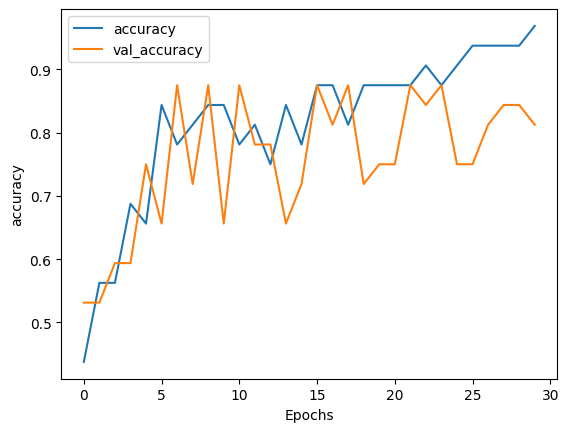

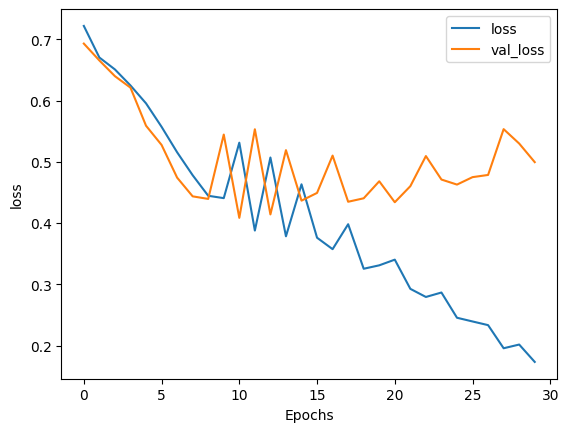

In [17]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model 2

In model two we add additional convolution layers and we reduce the complexity of architecture in fully connected layer to have a better accuracy. We also are adding Dropout layer to fight with overfitting in the training process.

In [18]:

model2 = Sequential([
   tf.keras.layers.Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(64, activation="relu"),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(32, activation="relu"),
   tf.keras.layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)         

In [19]:
history_2 = model2.fit(
    X_train, y_train,
    epochs = 30,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.6841 - accuracy: 0.5625 - val_loss: 0.6928 - val_accuracy: 0.5312
Epoch 2/30
1/1 [==============================] - 0s 229ms/step - loss: 0.6785 - accuracy: 0.5625 - val_loss: 0.6980 - val_accuracy: 0.5312
Epoch 3/30
1/1 [==============================] - 0s 237ms/step - loss: 0.6603 - accuracy: 0.5625 - val_loss: 0.6990 - val_accuracy: 0.5312
Epoch 4/30
1/1 [==============================] - 0s 254ms/step - loss: 0.6601 - accuracy: 0.5625 - val_loss: 0.6757 - val_accuracy: 0.5312
Epoch 5/30
1/1 [==============================] - 0s 252ms/step - loss: 0.6604 - accuracy: 0.5625 - val_loss: 0.6584 - val_accuracy: 0.5312
Epoch 6/30
1/1 [==============================] - 0s 249ms/step - loss: 0.6387 - accuracy: 0.5625 - val_loss: 0.6399 - val_accuracy: 0.5312
Epoch 7/30
1/1 [==============================] - 0s 255ms/step - loss: 0.6153 - accuracy: 0.5938 - val_loss: 0.6259 - val_accuracy: 0.5938
Epoch 8/30
1/1 [=======

In [20]:
loss, accuracy = model2.evaluate(X_train,y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test,y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9062
Testing Accuracy:  0.8125


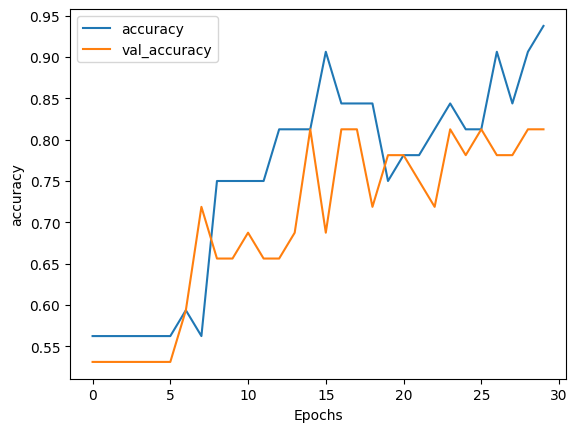

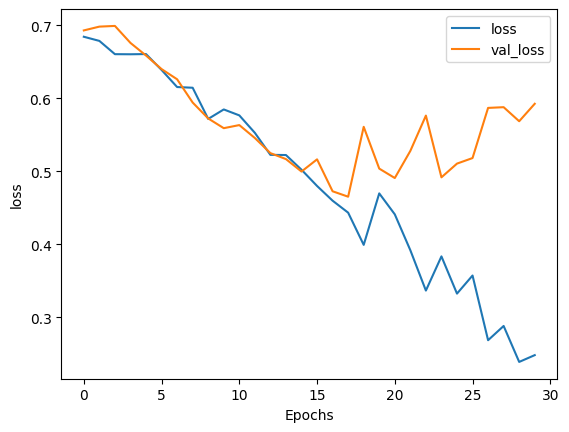

In [21]:
plot_graphs(history_2, "accuracy")
plot_graphs(history_2, "loss")



The validation accuracy is achieved 81% in the training process.

The training accuracy is increasing over time, whereas validation accuracy stalls around 80% in the training process. We also see that the overfitting slightly decreased. The validation loss reaches a minimum value after 5 epochs, and then stabilizes, with the training loss decreasing linearly until the values are close to 0.

Model 3

We also may add Batch Normalization to reduce overfitting.

In [23]:



model3 = Sequential([
   tf.keras.layers.Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu', padding='same'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(64, activation="relu"),
   tf.keras.layers.Dense(32, activation="relu"),
   tf.keras.layers.Dense(1, activation="sigmoid")
])

model3.compile(optimizer='adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                      

In [24]:
history_3 = model3.fit(
    X_train, y_train,
    epochs = 40,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/40
1/1 [==============================] - 5s 5s/step - loss: 0.8641 - accuracy: 0.5625 - val_loss: 0.6938 - val_accuracy: 0.5312
Epoch 2/40
1/1 [==============================] - 1s 513ms/step - loss: 0.2010 - accuracy: 0.9688 - val_loss: 0.6917 - val_accuracy: 0.5312
Epoch 3/40
1/1 [==============================] - 0s 404ms/step - loss: 0.0671 - accuracy: 1.0000 - val_loss: 0.6903 - val_accuracy: 0.5312
Epoch 4/40
1/1 [==============================] - 0s 332ms/step - loss: 0.0248 - accuracy: 1.0000 - val_loss: 0.6896 - val_accuracy: 0.5312
Epoch 5/40
1/1 [==============================] - 0s 359ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.6891 - val_accuracy: 0.5312
Epoch 6/40
1/1 [==============================] - 0s 352ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.6880 - val_accuracy: 0.5312
Epoch 7/40
1/1 [==============================] - 0s 320ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.6871 - val_accuracy: 0.5312
Epoch 8/40
1/1 [=======

In [25]:
loss, accuracy = model3.evaluate(X_test,y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.4688


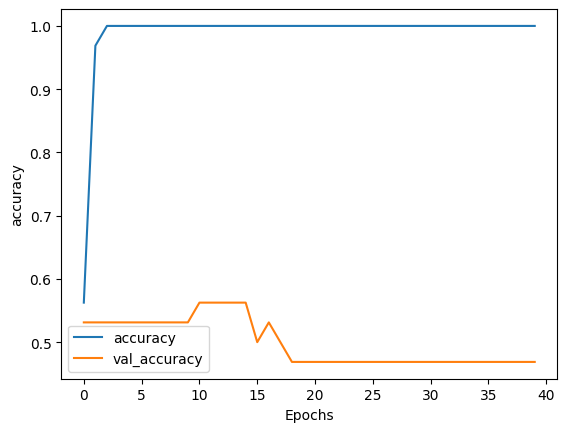

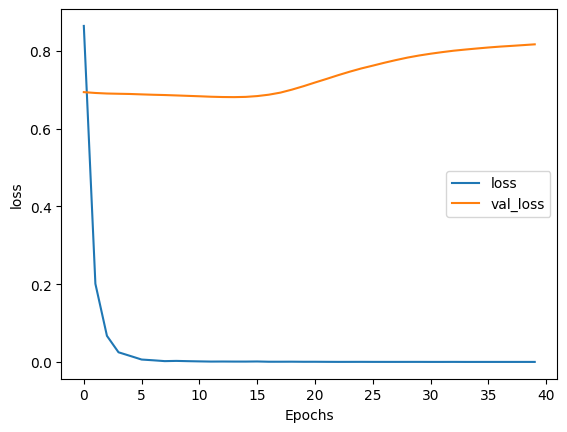

In [26]:

plot_graphs(history_3, "accuracy")
plot_graphs(history_3, "loss")


In this case we achaived the worst validation accuracy equal to 65% in the training process. We see that the training accuracy is increasing over time, whereas validation accuracy stalls around 65% in the training process. Unfortunately the overfitting has grown significantly.



Data preparation

We add data augumentation to our dataset. We use ImageDataGenerator to create a transformation that rescales the images and applied data augmentation as well. We generate augumentation only for train data while validation data are only rescaling ones.



In [40]:

train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip = True,
                                   rescale=1./255,
                                   validation_split=0.2)


val_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split=0.5)

In [41]:
batch_size = 32
img_size = (128, 128)

train_set = train_datagen.flow_from_directory(train_dir,
                                              class_mode='binary',
                                              batch_size = batch_size,
                                              target_size=img_size)

test_set = val_datagen.flow_from_directory(test_dir,
                                           class_mode = 'binary',
                                           batch_size = batch_size,
                                           target_size=img_size,
                                           subset= 'training')

val_set = val_datagen.flow_from_directory(test_dir,
                                          class_mode='binary',
                                          batch_size = batch_size,
                                          subset = 'validation',
                                          target_size=img_size)

Found 22644 images belonging to 2 classes.
Found 1260 images belonging to 2 classes.
Found 1260 images belonging to 2 classes.


Creating the model

We build model by using transfer learning with pre-trained MobileNet V2 model.

First we create the base MobileNetV2 model:

In [43]:


img_shape = (128,128,3)

base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [44]:
for layer in base_model.layers:
     layer.trainable = False


Model 1

The model 1 consists of Flatten layer, then we added two Dense layers with one Dropout layer as well.

In [45]:

model = tf.keras.Sequential([base_model,
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(32, activation="relu"),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(1, activation="sigmoid")
                             ])


In [46]:

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


In [47]:
steps_per_epoch=int(len(train_set)/batch_size)

In [56]:
model.fit(train_set,
          epochs=10,
          steps_per_epoch=steps_per_epoch,
          verbose=1
          )

Epoch 1/10
22/22 [==============================] - 215s 10s/step - loss: 0.4461 - accuracy: 0.8139
Epoch 2/10
22/22 [==============================] - 209s 10s/step - loss: 0.3668 - accuracy: 0.8366
Epoch 3/10
22/22 [==============================] - 203s 9s/step - loss: 0.3487 - accuracy: 0.8594
Epoch 4/10
22/22 [==============================] - 198s 9s/step - loss: 0.3866 - accuracy: 0.8494
Epoch 5/10
22/22 [==============================] - 192s 9s/step - loss: 0.3014 - accuracy: 0.8778
Epoch 6/10
22/22 [==============================] - 192s 9s/step - loss: 0.3229 - accuracy: 0.8594
Epoch 7/10
22/22 [==============================] - 178s 8s/step - loss: 0.2971 - accuracy: 0.8878
Epoch 8/10
22/22 [==============================] - 172s 8s/step - loss: 0.2875 - accuracy: 0.9006
Epoch 9/10
22/22 [==============================] - 170s 8s/step - loss: 0.3054 - accuracy: 0.8651
Epoch 10/10
22/22 [==============================] - 168s 8s/step - loss: 0.2525 - accuracy: 0.8849


In [57]:
# plot function
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

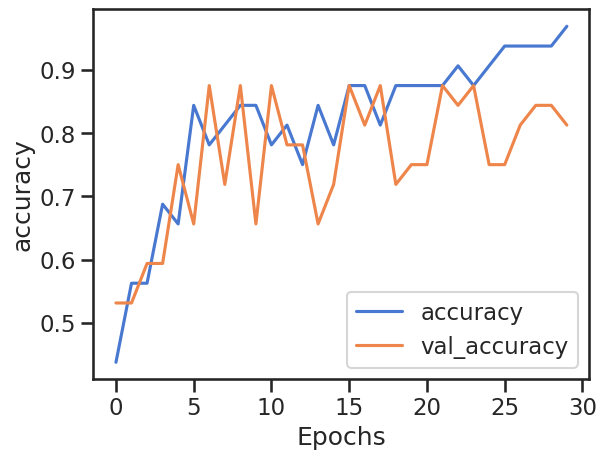

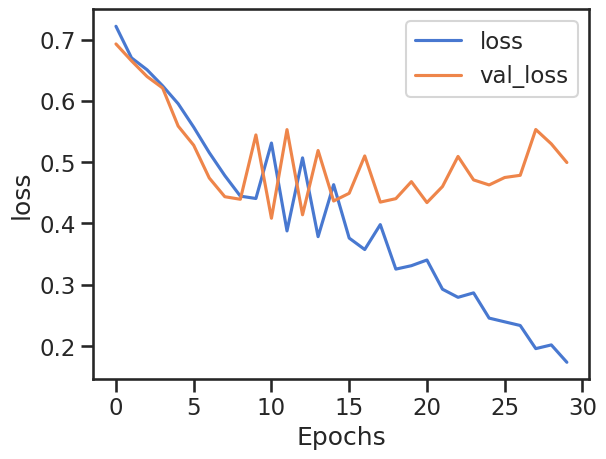

In [58]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


In [60]:
loss, accuracy = model.evaluate(test_set, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.8778


In [65]:
model.save("tf_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
